In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.linear_model import LogisticRegression


In [2]:
import warnings
warnings.filterwarnings('ignore')

### Question 1

In [4]:
%cd C:\\Users\\markg\\source\\repos\\uofm_course\

C:\Users\markg\source\repos\uofm_course


In [5]:
df = pd.read_csv('./datasets/ML/fraud_data.csv')

N = len(df.Class.values) 
T = (df.Class.values ==1).sum()/N
F = (df.Class.values ==0).sum()/N

result = (T,F)
result

(0.016410823768035772, 0.9835891762319642)

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2 

In [6]:
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
acc = dummy.score(X_test, y_test)

y_score = dummy.predict(X_test)
rec = recall_score(y_test, y_score)

result = (acc,rec)
result

(0.9852507374631269, 0.0)

### Question 3

In [7]:
svc = SVC().fit(X_train, y_train)
acc = svc.score(X_test, y_test)

y_score = svc.predict(X_test)
rec = recall_score(y_test, y_score)
pre = precision_score(y_test, y_score)

result = (acc,rec, pre)
result

(0.9900442477876106, 0.35, 0.9333333333333333)

### Quesion 4

In [8]:
svc = SVC(C= 1e9, gamma = 1e-7).fit(X_train, y_train)

acc = svc.score(X_test, y_test)

y_score = svc.decision_function(X_test) > -220

confusion_matrix(y_test, y_score)


array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5 

In [9]:
lgclf = LogisticRegression().fit(X_train, y_train)

y_score = lgclf.predict_proba(X_test)[:,1] # returns only the prob it is 1, ie that it is fraud

#Precision-recall
pre, rec, thr1 = precision_recall_curve(y_test, y_score)

# ROC curve
fpr, tpr, thr2 = roc_curve(y_test, y_score)

recall = rec[np.abs(pre - 0.75).argmin()]
tprate = tpr[np.abs(fpr - 0.16).argmin()]
recall,tprate

(0.8125, 0.925)

#### Graphs for Fun

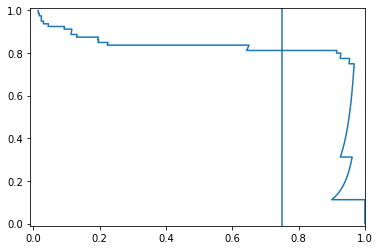

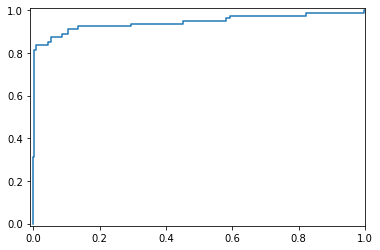

In [10]:
# Precision-Recall curve
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(pre, rec)
plt.axvline(x=0.75)
plt.show();
plt.close()

# ROC curve
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr)
plt.show();
plt.close()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

'penalty': ['l1', 'l2']

'C':[0.01, 0.1, 1, 10, 100]

In [15]:
params = {'penalty': ['l1','l2'], 'C':[0.01 ,0.1 ,1 ,10 ,100]}

lg = LogisticRegression(solver='liblinear') # Default solver is lbfgs, which doesn't support l1 regularisation, 
                                            # liblinear does, but it compares one versus the rest
                                            # Default solver was changed in a previous edition

grid = GridSearchCV(lg, param_grid = params, scoring = 'recall', cv = 5, error_score = 'raise')

grid.fit(X_train, y_train)
grid.cv_results_['mean_test_score']

# works on other notebook??
## shouldn't be returning nan

array([0.69558442, 0.77168831, 0.80792208, 0.81155844, 0.80428571,
       0.81149351, 0.80064935, 0.80064935, 0.80064935, 0.80064935])